In [2]:
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression




In [3]:
df = pd.read_csv('/content/emails.csv')

In [4]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


Prediction
0    3672
1    1500
Name: count, dtype: int64
-------------------------------------------


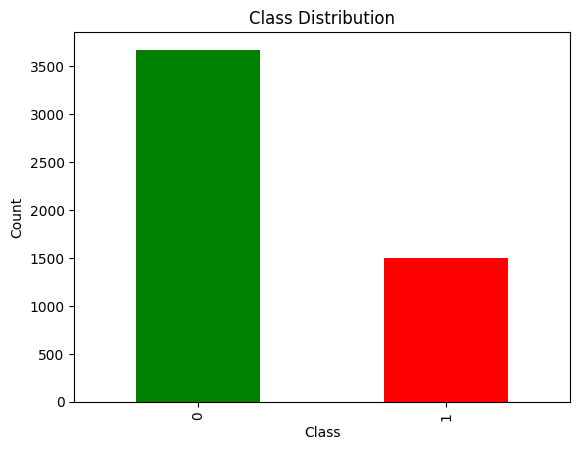

In [6]:
# count the num of samples in each class
class_distribution = df['Prediction'].value_counts()
print(class_distribution)
print("-------------------------------------------")
class_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [8]:
from sklearn.utils import resample
df_majority = df[df['Prediction'] == 0]
df_minority = df[df['Prediction'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # Sample without replacement
                                   n_samples=len(df_minority),  # Match minority class size
                                   random_state=42)

# Combine the downsampled majority class with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Check the new class distribution
print(df_balanced['Prediction'].value_counts())

Prediction
0    1500
1    1500
Name: count, dtype: int64


In [9]:
df_balanced = df_balanced.drop(columns='Email No.')

In [11]:
X = df_balanced.drop(columns='Prediction')
y = df_balanced['Prediction']

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [13]:
model = LogisticRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test , y_pred)
print (f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.67%


In [19]:
from sklearn.metrics import accuracy_score, classification_report
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       313
           1       0.93      0.98      0.96       287

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

